In [ ]:
# import useful libraries
import numpy as np
import torch
import matplotlib.pyplot as plt

import os
import sys

# add parent directory to sys.path to import STL package modules
PARENT_DIR = os.path.dirname(os.path.abspath(os.getcwd() + "../../../"))
sys.path.append(PARENT_DIR)
print("Parent directory added to sys.path:", ".../" + PARENT_DIR.split("/")[-1])

# test data directory
DATA_TEST_PATH = PARENT_DIR + "/data" + "/test"
print("Dataset dirctory used:", ".../" + PARENT_DIR.split("/")[-1] + DATA_TEST_PATH.split(PARENT_DIR.split("/")[-1])[-1])


from STL_main.STL_2D_FFT_Torch import STL_2D_FFT_Torch as STLDataClass

Parent directory added to sys.path: .../STL-Dev
Dataset dirctory used: .../STL-Dev/data/test


In [2]:
# command to auto-reload modules when they are edited (easier for testing and debugging)
%load_ext autoreload
%autoreload 2

## Wavelet Operator class

shape data = (256, 256)
shape data_full = (20, 256, 256)


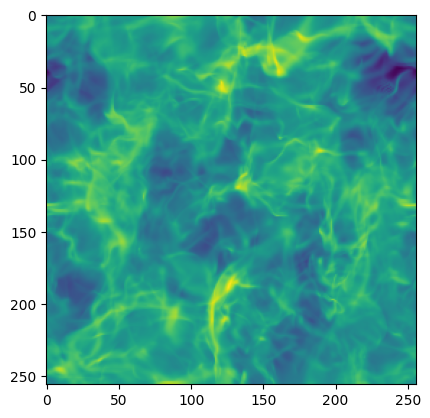

In [3]:
# Load some data
data_full = np.load(DATA_TEST_PATH + "/" + "Turb_6.npy")
data = data_full[0]
print("shape data = " + str(data.shape))
print("shape data_full = " + str(data_full.shape))
plt.imshow(data)

In [5]:
# Initialization of StlData for MR=False
stl_data = STLDataClass(data)

In [6]:
# Construct the wavelet operator
Wave_Op = stl_data.get_wavelet_op()

In [7]:
# Check the wavelet operator parameters
print("For Wave_Op:")
print("N0 = " + str(Wave_Op.N0))
print("J = " + str(Wave_Op.J))
print("L = " + str(Wave_Op.L))
print("WType = " + str(Wave_Op.WType))
print("Type wavelet_array = " + str(type(Wave_Op.wavelet_array)))
print("Shape wavelet_array = " + str(Wave_Op.wavelet_array.shape))
print("Type wavelet_array_MR = " + str(type(Wave_Op.wavelet_array_MR)))
print("dg_max = " + str(Wave_Op.dg_max))
print("j_to_dg = " + str(Wave_Op.j_to_dg))
print("Single_Kernel = " + str(Wave_Op.Single_Kernel))
print("mask_opt = " + str(Wave_Op.mask_opt))

# Fix J and L values
J = Wave_Op.J
L = Wave_Op.L

For Wave_Op:
N0 = (256, 256)
J = 6
L = 4
WType = Crappy
Type wavelet_array = <class 'torch.Tensor'>
Shape wavelet_array = torch.Size([6, 4, 256, 256])
Type wavelet_array_MR = <class 'list'>
dg_max = 4
j_to_dg = [0, 1, 2, 3, 4, 4]
Single_Kernel = None
mask_opt = None


In [8]:
# Check the wavelet wavelet_array_MR structure
print("Len of wavelet_array_MR = " + str(len(Wave_Op.wavelet_array_MR)))
for j in range(J):
    print("Shape wavelet_array_MR for j=" + str(j) + " is " + str(Wave_Op.wavelet_array_MR[j].shape))


Len of wavelet_array_MR = 6
Shape wavelet_array_MR for j=0 is torch.Size([4, 256, 256])
Shape wavelet_array_MR for j=1 is torch.Size([4, 128, 128])
Shape wavelet_array_MR for j=2 is torch.Size([4, 64, 64])
Shape wavelet_array_MR for j=3 is torch.Size([4, 32, 32])
Shape wavelet_array_MR for j=4 is torch.Size([4, 16, 16])
Shape wavelet_array_MR for j=5 is torch.Size([4, 16, 16])


## Plot in Fourier and real space

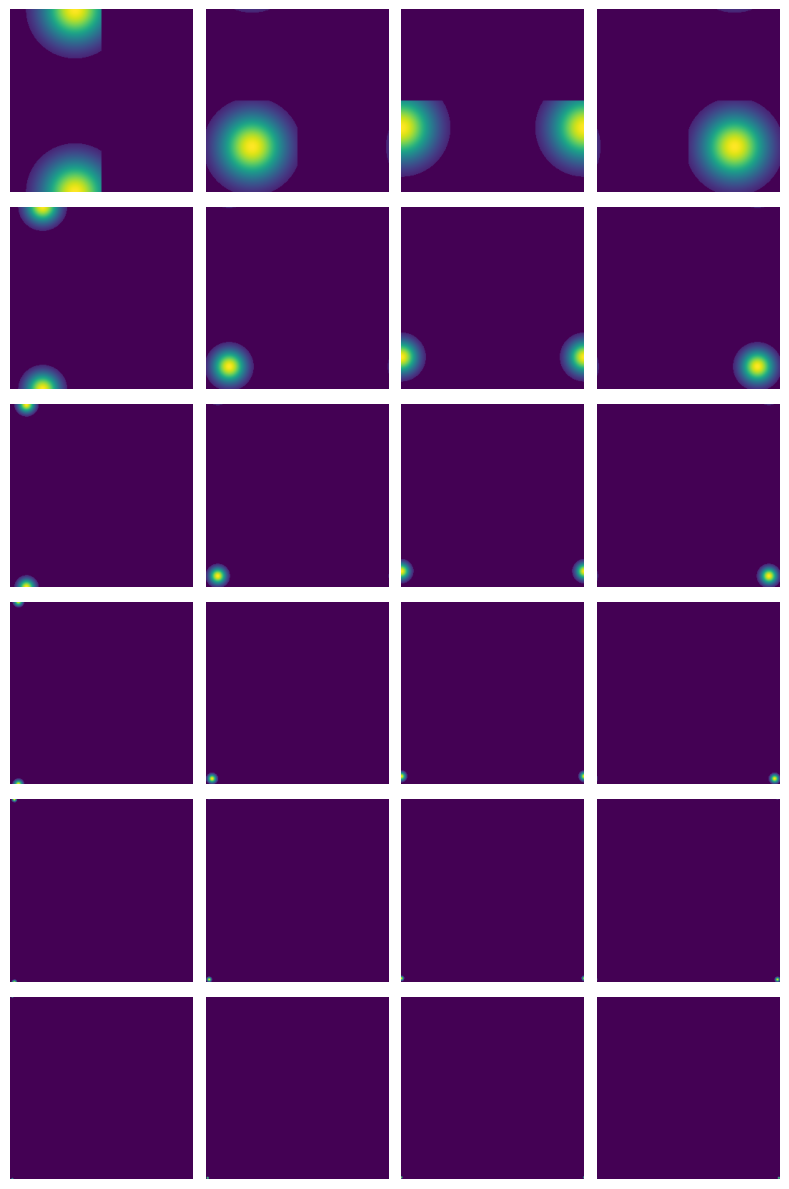

In [9]:
# Plot the wavelet set in Fourier
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(Wave_Op.wavelet_array[j, l])
        ax.axis('off')

plt.tight_layout()
plt.show()

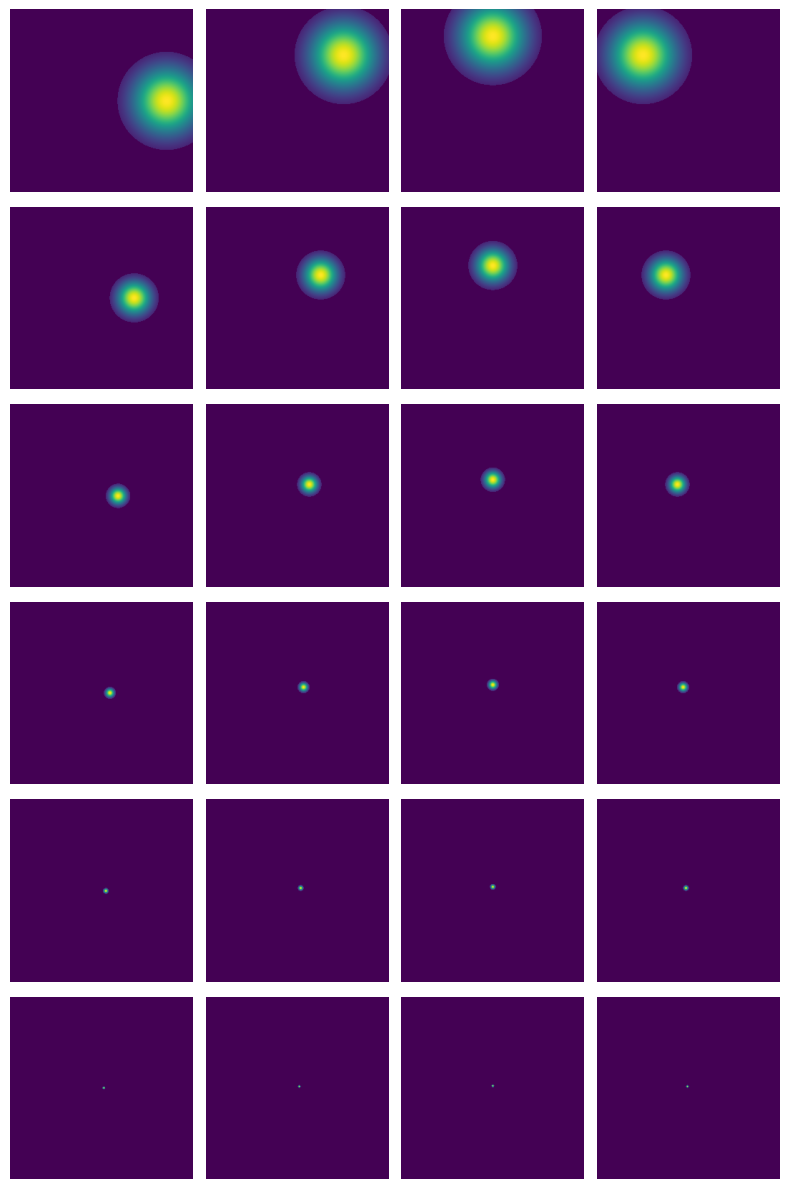

In [12]:
# Plot the wavelet set in Fourier, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(Wave_Op.wavelet_array[j, l], dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

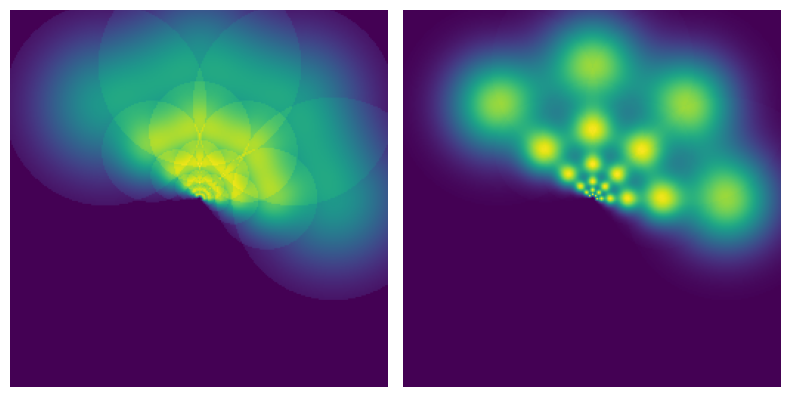

In [13]:
# Plot the sum and quadratic sum of the wavelets

# Plot the wavelet set in Fourier, with fftshift
fig, axs = plt.subplots(1, 2, figsize=(8, 16))

axs[0].imshow(torch.fft.fftshift(Wave_Op.wavelet_array.sum(dim=(0,1)), dim=(-2,-1)))
axs[0].axis('off')
axs[1].imshow(torch.fft.fftshift((Wave_Op.wavelet_array**2).sum(dim=(0,1)), dim=(-2,-1)))
axs[1].axis('off')

plt.tight_layout()
plt.show()

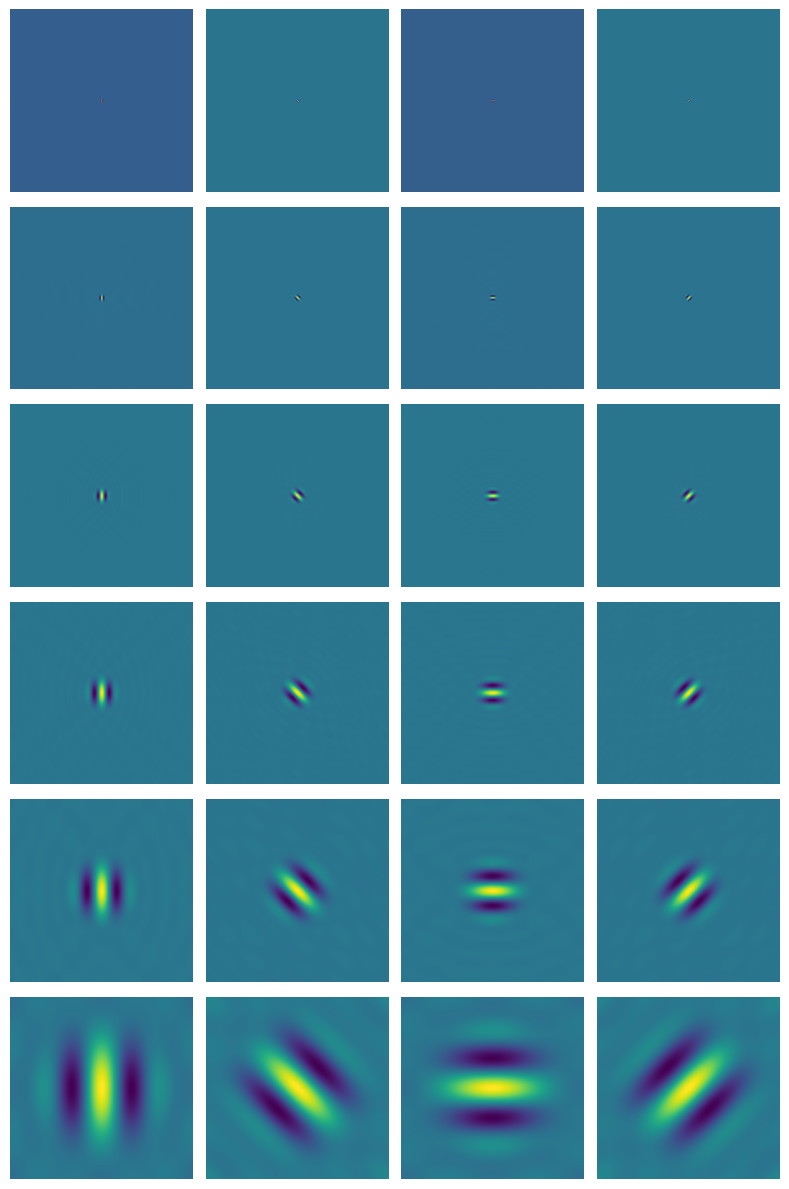

In [14]:
# Plot the wavelet set in real space, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(torch.fft.fft2(Wave_Op.wavelet_array[j, l]).real, dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

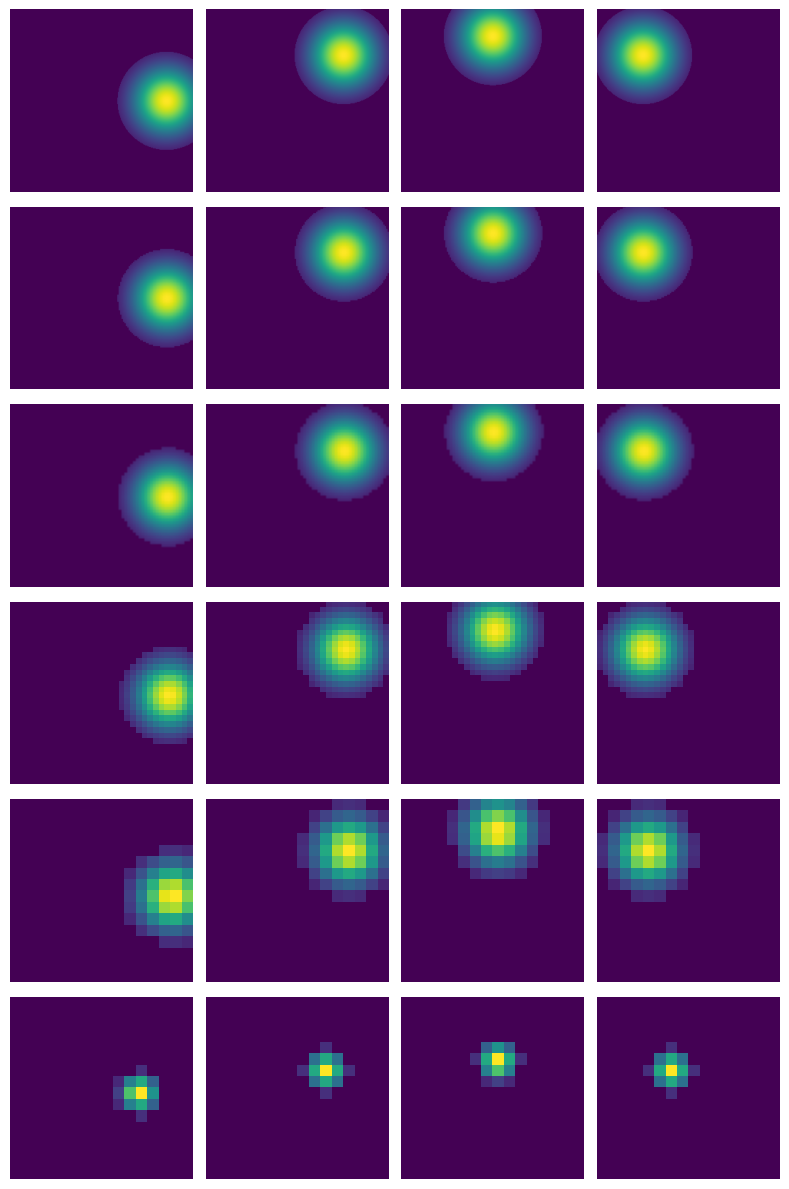

In [15]:
# Plot the MR wavelet set in Fourier, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(Wave_Op.wavelet_array_MR[j][l], dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

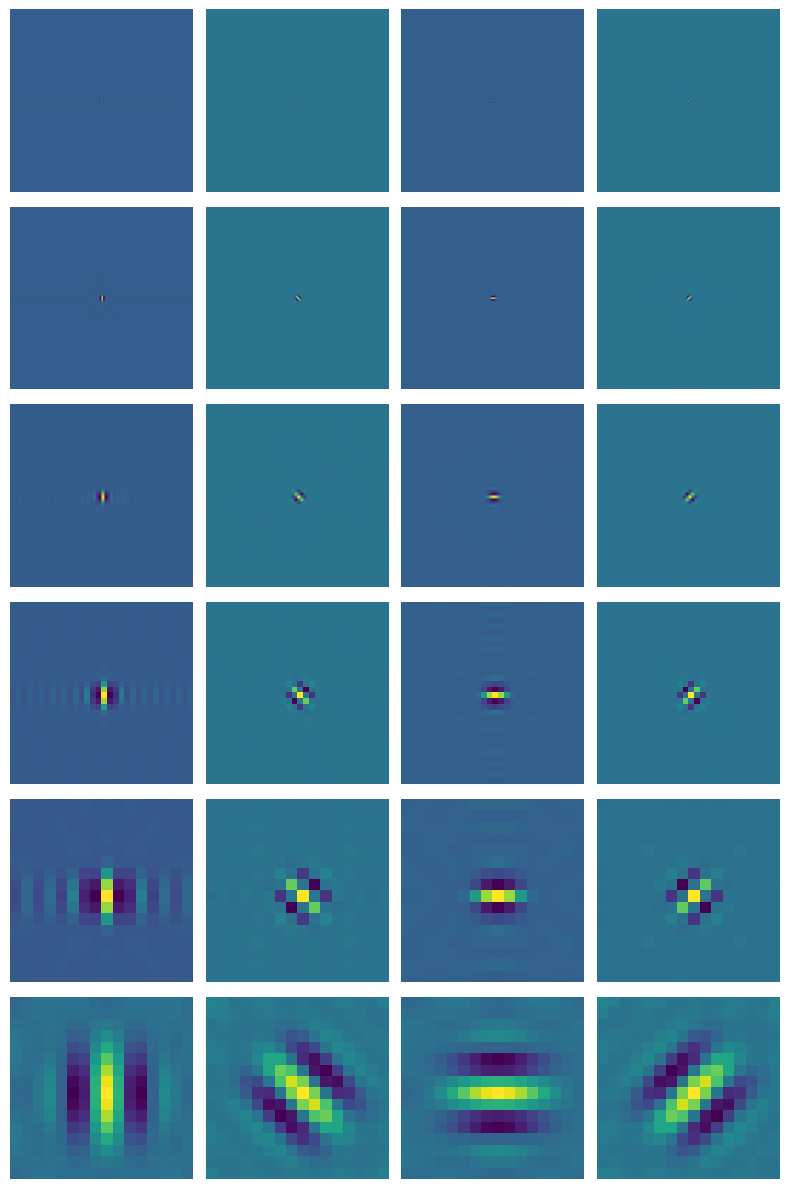

In [16]:
# Plot the MR wavelet set in real space, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow( torch.fft.fftshift(
            torch.fft.fft2(Wave_Op.wavelet_array_MR[j][l]).real
                  , dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

## Wavelet Operator and plot with non-standard sizes

In [18]:
# Initialization of StlData for MR=False
stl_data2 = STLDataClass(data[:187, :249])

In [19]:
# Construct the wavelet operator
Wave_Op = stl_data2.get_wavelet_op()

In [20]:
# Check the wavelet operator parameters
print("For Wave_Op:")
print("N0 = " + str(Wave_Op.N0))
print("J = " + str(Wave_Op.J))
print("L = " + str(Wave_Op.L))
print("WType = " + str(Wave_Op.WType))
print("Type wavelet_array = " + str(type(Wave_Op.wavelet_array)))
print("Shape wavelet_array = " + str(Wave_Op.wavelet_array.shape))
print("Type wavelet_array_MR = " + str(type(Wave_Op.wavelet_array_MR)))
print("dg_max = " + str(Wave_Op.dg_max))
print("j_to_dg = " + str(Wave_Op.j_to_dg))
print("Single_Kernel = " + str(Wave_Op.Single_Kernel))
print("mask_opt = " + str(Wave_Op.mask_opt))

# Fix J and L values
J = Wave_Op.J
L = Wave_Op.L

For Wave_Op:
N0 = (187, 249)
J = 5
L = 4
WType = Crappy
Type wavelet_array = <class 'torch.Tensor'>
Shape wavelet_array = torch.Size([5, 4, 187, 249])
Type wavelet_array_MR = <class 'list'>
dg_max = 3
j_to_dg = [0, 1, 2, 3, 3]
Single_Kernel = None
mask_opt = None


In [21]:
# Check the wavelet wavelet_array_MR structure
print("Len of wavelet_array_MR = " + str(len(Wave_Op.wavelet_array_MR)))
for j in range(J):
    print("Shape wavelet_array_MR for j=" + str(j) + " is " + str(Wave_Op.wavelet_array_MR[j].shape))


Len of wavelet_array_MR = 5
Shape wavelet_array_MR for j=0 is torch.Size([4, 187, 249])
Shape wavelet_array_MR for j=1 is torch.Size([4, 92, 124])
Shape wavelet_array_MR for j=2 is torch.Size([4, 46, 62])
Shape wavelet_array_MR for j=3 is torch.Size([4, 22, 30])
Shape wavelet_array_MR for j=4 is torch.Size([4, 22, 30])


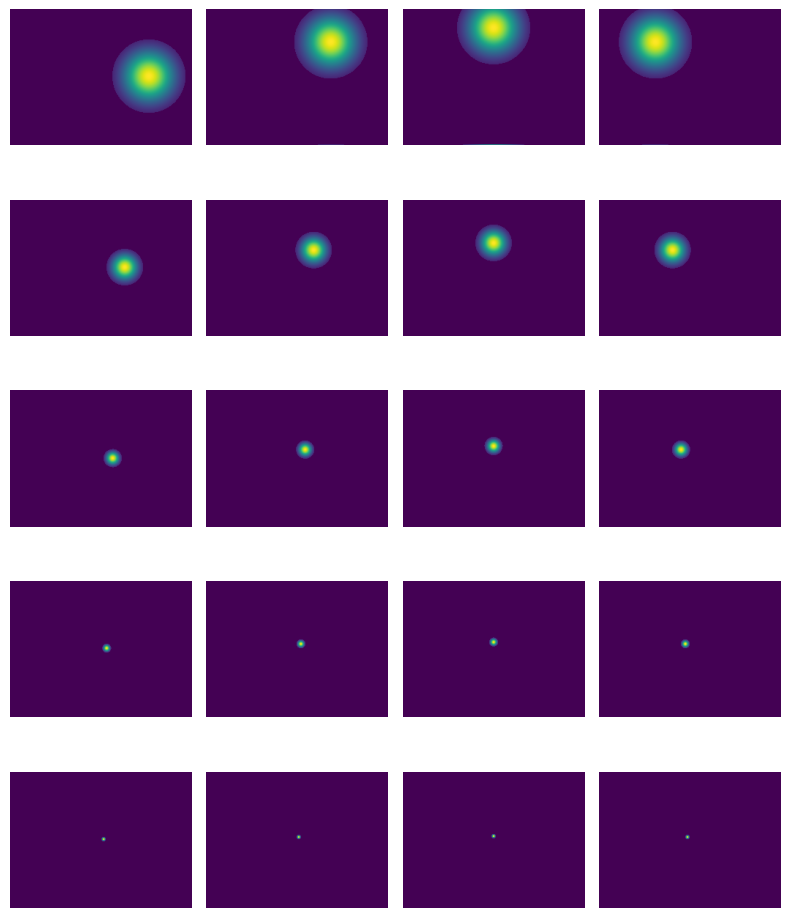

In [22]:
# Plot the wavelet set in Fourier, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(Wave_Op.wavelet_array[j, l], dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

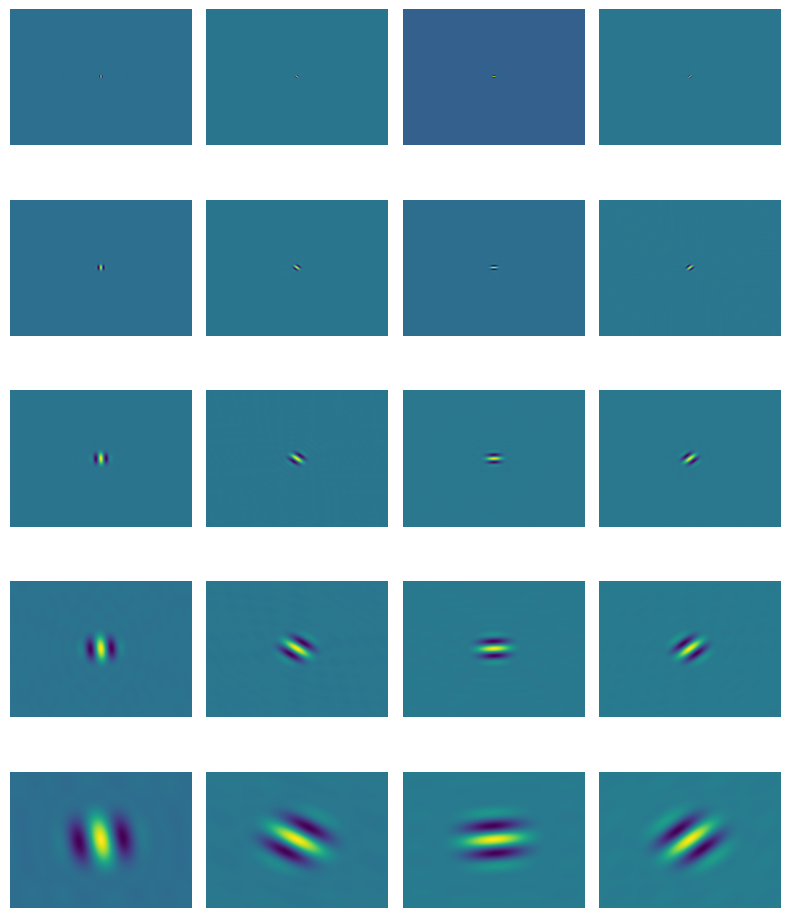

In [23]:
# Plot the wavelet set in real space, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow( torch.fft.fftshift(
            torch.fft.fft2(Wave_Op.wavelet_array[j, l]).real
                  , dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

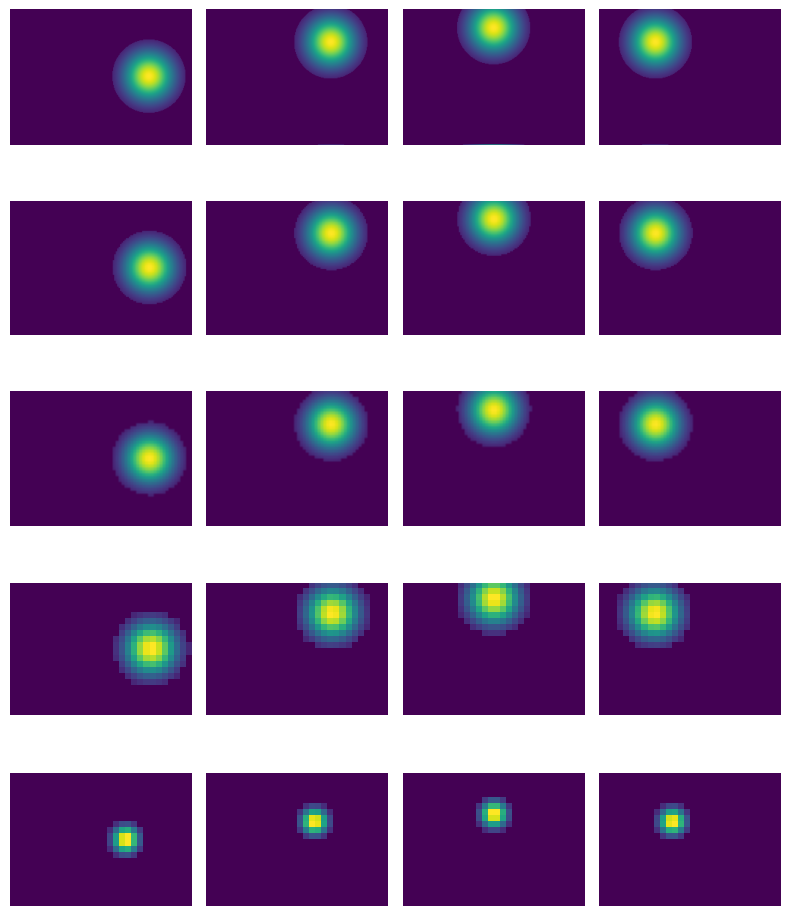

In [24]:
# Plot the MR wavelet set in Fourier, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(Wave_Op.wavelet_array_MR[j][l], dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

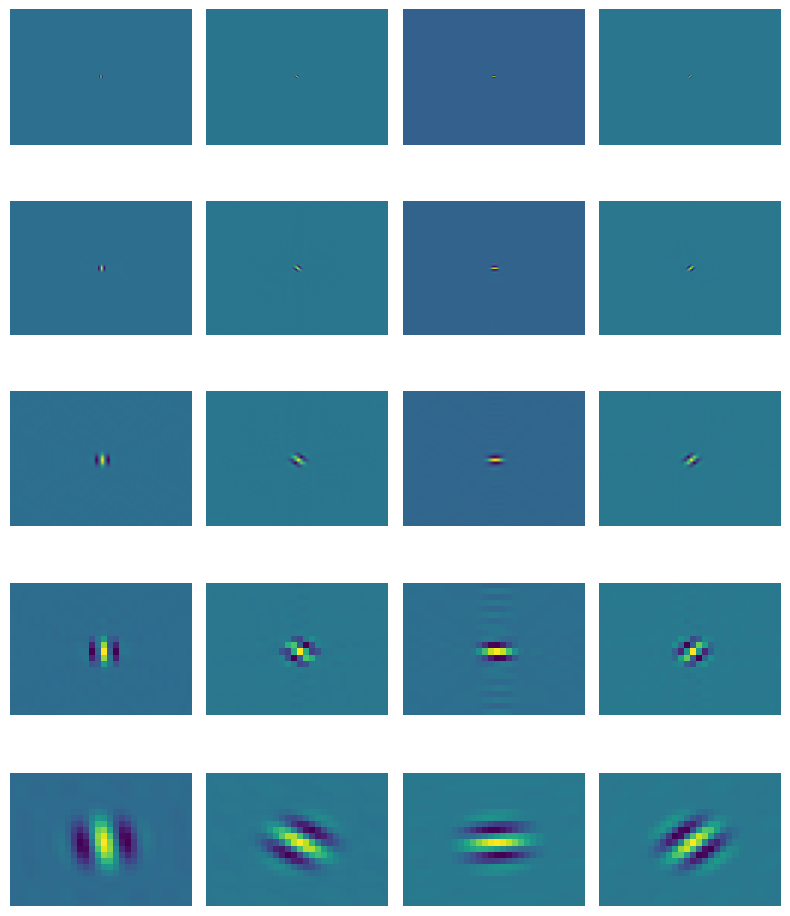

In [25]:
# Plot the MR wavelet set in real space, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow( torch.fft.fftshift(
            torch.fft.fft2(Wave_Op.wavelet_array_MR[j][l]).real
                  , dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()